In [1]:
import allel
import pcshrink
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read in Data

In [44]:
ind2pop = pd.read_table('/Users/chichun/Desktop/MS_thesis/data/sample.list')
pops = ['YRI', 'CEU', 'CDX', 'GIH', 'ASW', 'GBR', 'CEU']
ind2pop = ind2pop[ind2pop['pop'].isin(pops)]#.sample(frac = .5)

In [46]:
# for out-of-sample projection
ind2pop_oos = ind2pop.iloc[:255,:]
samples_oos = ind2pop_oos['sample'].values
# training samples
ind2pop = ind2pop.iloc[255:,:]
samples = ind2pop['sample'].values

In [49]:
callset = allel.read_vcf('/Users/chichun/Desktop/MS_thesis/data/1KG.HO_SNPs.autosomes.vcf.gz', samples = samples, fields='*')
gt = allel.GenotypeArray(callset['calldata/GT'])
gt = gt.to_n_alt()
callset = allel.read_vcf('/Users/chichun/Desktop/MS_thesis/data/1KG.HO_SNPs.autosomes.vcf.gz', samples = samples_oos, fields='*')
gt_oos = allel.GenotypeArray(callset['calldata/GT'])
gt_oos = gt_oos.to_n_alt()
del callset

### PCshrink

In [56]:
norm = pcshrink.Normalizer(gt, .05, 'patterson')
pcsrk = pcshrink.ShrinkageCorrector(norm.Y * np.sqrt(2), 4)

In [57]:
# rank-one downdate
t = time.process_time()
pcsrk.jackknife(downdate = True, q = 2, o = 100)
time.process_time() - t

holding out sample 0
holding out sample 100
holding out sample 200


94.16160799999989

In [58]:
pcsrk.tau

array([1.02601575, 1.27485695])

In [59]:
t = time.process_time()
pcsrk.jackknife(downdate = False, q = 2, o = 100)
time.process_time() - t

holding out sample 0
holding out sample 100
holding out sample 200


1346.158507

In [60]:
pcsrk.tau

array([1.02601575, 1.27485695])

### projected samples are shrunk

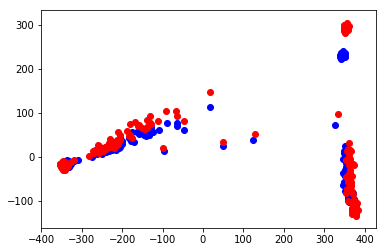

In [62]:
plt.scatter(pcsrk.L_shrunk[:,0], pcsrk.L_shrunk[:,1] , c='b')
plt.scatter(pcsrk.L[:,0], pcsrk.L[:,1] , c='r')